In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [3]:
df1 = pd.read_csv('pdip.csv', delimiter=";")
df2 = pd.read_csv('pdip2.csv', delimiter=";")
df = pd.concat([df1, df2], ignore_index=True)

df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Wed Oct 18 23:59:55 +0000 2023,1714793464033157342,Pdip lagi wkwkwkwk,0,0,0,0,in,76294661,1714793464033157342,bimaprimidiza,https://twitter.com/bimaprimidiza/status/17147...
1,Wed Oct 18 23:58:30 +0000 2023,1714793105579466836,@Fahrihamzah Buat partai tapi kader partai lai...,0,0,0,0,in,816133802783166464,1714559650379764075,sitolin8,https://twitter.com/sitolin8/status/1714793105...
2,Wed Oct 18 23:58:18 +0000 2023,1714793055847616797,@Samlawi_84 @AtrirRst48250 @BangPakat @YudhaSh...,0,0,0,0,in,1596913323483623425,1714636993286820097,tunggulkayu01,https://twitter.com/tunggulkayu01/status/17147...
3,Wed Oct 18 23:57:09 +0000 2023,1714792766788808886,@HakimGarisLurus @ahmadsaifulch @Paltiwest Iya...,0,0,0,4,in,1190530742553460736,1714670903903338580,Smart_O_,https://twitter.com/Smart_O_/status/1714792766...
4,Wed Oct 18 23:56:48 +0000 2023,1714792679484383269,Kasiandolo Sandi gagal Cawapres karena PPP seb...,0,0,0,1,in,1155443417347842048,1714792679484383269,LauHamzah,https://twitter.com/LauHamzah/status/171479267...
...,...,...,...,...,...,...,...,...,...,...,...,...
1756,Mon Oct 23 01:53:02 +0000 2023,1716271482027008068,@Anak__Ogi @gibran_tweet Detik² terakhir akan ...,0,0,0,0,in,1650749407628005376,1715747307982057771,GPolitik1277,https://twitter.com/GPolitik1277/status/171627...
1757,Mon Oct 23 01:52:31 +0000 2023,1716271349419942294,@ChristianJazzy Ya PDIP nunggu sikap Ksatriany...,0,1,0,1,in,1529491450605768704,1716129682880647674,StefanAntonio__,https://twitter.com/StefanAntonio__/status/171...
1758,Mon Oct 23 01:52:27 +0000 2023,1716271335209632019,Acara seminar kok Nongol Film PORNO..... 😜😜🤪...,0,0,0,0,in,1491586743350411266,1716271335209632019,13lue_Oc3an__,https://twitter.com/13lue_Oc3an__/status/17162...
1759,Mon Oct 23 01:52:21 +0000 2023,1716271309502746764,"Dorothy Hoffner, 104 Tahun dan Pecahkan Rekor ...",0,0,0,0,in,96970566,1716271309502746764,infoterkiniv,https://twitter.com/infoterkiniv/status/171627...


In [4]:
data = df.drop(['tweet_url', 'conversation_id_str','user_id_str','lang','quote_count',
         'id_str', 'created_at'], axis=1)

In [5]:
data

,full_text,reply_count,retweet_count,favorite_count,username
0,Pdip lagi wkwkwkwk,0,0,0,bimaprimidiza
1,@Fahrihamzah Buat partai tapi kader partai lai...,0,0,0,sitolin8
2,@Samlawi_84 @AtrirRst48250 @BangPakat @YudhaSh...,0,0,0,tunggulkayu01
3,@HakimGarisLurus @ahmadsaifulch @Paltiwest Iya...,0,0,4,Smart_O_
4,Kasiandolo Sandi gagal Cawapres karena PPP seb...,0,0,1,LauHamzah
...,...,...,...,...,...
1756,@Anak__Ogi @gibran_tweet Detik² terakhir akan ...,0,0,0,GPolitik1277
1757,@ChristianJazzy Ya PDIP nunggu sikap Ksatriany...,1,0,1,StefanAntonio__
1758,Acara seminar kok Nongol Film PORNO..... 😜😜🤪...,0,0,0,13lue_Oc3an__
1759,"Dorothy Hoffner, 104 Tahun dan Pecahkan Rekor ...",0,0,0,infoterkiniv


In [6]:
import re

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    # Menggunakan ekspresi reguler untuk menghapus tanda baca
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

# Membersihkan tanda baca pada kolom teks
data['full_text']  = data['full_text'].apply(lambda x: remove_punctuation(x))


In [7]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks
def stemming(teks):
    return stemmer.stem(teks)

# Terapkan fungsi ke kolom full_text DataFrame
data['full_text'] = data['full_text'].apply(stemming)


In [8]:
# Tokenisasi
data['text_tokens'] = data['full_text'].apply(lambda x: word_tokenize(x))

In [9]:
data

,full_text,reply_count,retweet_count,favorite_count,username,text_tokens
0,pdip lagi wkwkwkwk,0,0,0,bimaprimidiza,"[pdip, lagi, wkwkwkwk]"
1,fahrihamzah buat partai tapi kader partai lain...,0,0,0,sitolin8,"[fahrihamzah, buat, partai, tapi, kader, parta..."
2,samlawi 84 atrirrst48250 bangpakat yudhashanny...,0,0,0,tunggulkayu01,"[samlawi, 84, atrirrst48250, bangpakat, yudhas..."
3,hakimgarislurus ahmadsaifulch paltiwest iya pd...,0,0,4,Smart_O_,"[hakimgarislurus, ahmadsaifulch, paltiwest, iy..."
4,kasiandolo sandi gagal cawapres karena ppp bag...,0,0,1,LauHamzah,"[kasiandolo, sandi, gagal, cawapres, karena, p..."
...,...,...,...,...,...,...
1756,anak ogi gibran tweet detik akhir akan menentu...,0,0,0,GPolitik1277,"[anak, ogi, gibran, tweet, detik, akhir, akan,..."
1757,christianjazzy ya pdip nunggu sikap ksatria gi...,1,0,1,StefanAntonio__,"[christianjazzy, ya, pdip, nunggu, sikap, ksat..."
1758,acara seminar kok nongol film porno apa karena...,0,0,0,13lue_Oc3an__,"[acara, seminar, kok, nongol, film, porno, apa..."
1759,dorothy hoffner 104 tahun dan pecah rekor duni...,0,0,0,infoterkiniv,"[dorothy, hoffner, 104, tahun, dan, pecah, rek..."


In [10]:
# Stopword removal
stop_words = set(stopwords.words('indonesian'))
data['text_tokens'] = data['text_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [11]:
data

,full_text,reply_count,retweet_count,favorite_count,username,text_tokens
0,pdip lagi wkwkwkwk,0,0,0,bimaprimidiza,"[pdip, wkwkwkwk]"
1,fahrihamzah buat partai tapi kader partai lain...,0,0,0,sitolin8,"[fahrihamzah, partai, kader, partai, sanjung, ..."
2,samlawi 84 atrirrst48250 bangpakat yudhashanny...,0,0,0,tunggulkayu01,"[samlawi, 84, atrirrst48250, bangpakat, yudhas..."
3,hakimgarislurus ahmadsaifulch paltiwest iya pd...,0,0,4,Smart_O_,"[hakimgarislurus, ahmadsaifulch, paltiwest, iy..."
4,kasiandolo sandi gagal cawapres karena ppp bag...,0,0,1,LauHamzah,"[kasiandolo, sandi, gagal, cawapres, ppp, duku..."
...,...,...,...,...,...,...
1756,anak ogi gibran tweet detik akhir akan menentu...,0,0,0,GPolitik1277,"[anak, ogi, gibran, tweet, detik, menentukanda..."
1757,christianjazzy ya pdip nunggu sikap ksatria gi...,1,0,1,StefanAntonio__,"[christianjazzy, ya, pdip, nunggu, sikap, ksat..."
1758,acara seminar kok nongol film porno apa karena...,0,0,0,13lue_Oc3an__,"[acara, seminar, nongol, film, porno, capres, ..."
1759,dorothy hoffner 104 tahun dan pecah rekor duni...,0,0,0,infoterkiniv,"[dorothy, hoffner, 104, pecah, rekor, dunia, t..."


In [12]:
# Stemming
porter = PorterStemmer()
data['stemmed_tokens'] = data['text_tokens'].apply(lambda x: [porter.stem(word) for word in x])

In [13]:
data

,full_text,reply_count,retweet_count,favorite_count,username,text_tokens,stemmed_tokens
0,pdip lagi wkwkwkwk,0,0,0,bimaprimidiza,"[pdip, wkwkwkwk]","[pdip, wkwkwkwk]"
1,fahrihamzah buat partai tapi kader partai lain...,0,0,0,sitolin8,"[fahrihamzah, partai, kader, partai, sanjung, ...","[fahrihamzah, partai, kader, partai, sanjung, ..."
2,samlawi 84 atrirrst48250 bangpakat yudhashanny...,0,0,0,tunggulkayu01,"[samlawi, 84, atrirrst48250, bangpakat, yudhas...","[samlawi, 84, atrirrst48250, bangpakat, yudhas..."
3,hakimgarislurus ahmadsaifulch paltiwest iya pd...,0,0,4,Smart_O_,"[hakimgarislurus, ahmadsaifulch, paltiwest, iy...","[hakimgarisluru, ahmadsaifulch, paltiwest, iya..."
4,kasiandolo sandi gagal cawapres karena ppp bag...,0,0,1,LauHamzah,"[kasiandolo, sandi, gagal, cawapres, ppp, duku...","[kasiandolo, sandi, gagal, cawapr, ppp, dukung..."
...,...,...,...,...,...,...,...
1756,anak ogi gibran tweet detik akhir akan menentu...,0,0,0,GPolitik1277,"[anak, ogi, gibran, tweet, detik, menentukanda...","[anak, ogi, gibran, tweet, detik, menentukanda..."
1757,christianjazzy ya pdip nunggu sikap ksatria gi...,1,0,1,StefanAntonio__,"[christianjazzy, ya, pdip, nunggu, sikap, ksat...","[christianjazzi, ya, pdip, nunggu, sikap, ksat..."
1758,acara seminar kok nongol film porno apa karena...,0,0,0,13lue_Oc3an__,"[acara, seminar, nongol, film, porno, capres, ...","[acara, seminar, nongol, film, porno, capr, pd..."
1759,dorothy hoffner 104 tahun dan pecah rekor duni...,0,0,0,infoterkiniv,"[dorothy, hoffner, 104, pecah, rekor, dunia, t...","[dorothi, hoffner, 104, pecah, rekor, dunia, t..."


In [14]:
# Hapus kata "PDIP" dari kolom 'stemmed_tokens' dalam dataframe 'data'
data['stemmed_tokens'] = data['stemmed_tokens'].apply(lambda tokens: [token for token in tokens if token != "pdip"])


In [15]:
data['stemmed_tokens'] = data['stemmed_tokens'].apply(lambda tokens: [token for token in tokens if token != "yg"])


In [16]:
data

,full_text,reply_count,retweet_count,favorite_count,username,text_tokens,stemmed_tokens
0,pdip lagi wkwkwkwk,0,0,0,bimaprimidiza,"[pdip, wkwkwkwk]",[wkwkwkwk]
1,fahrihamzah buat partai tapi kader partai lain...,0,0,0,sitolin8,"[fahrihamzah, partai, kader, partai, sanjung, ...","[fahrihamzah, partai, kader, partai, sanjung, ..."
2,samlawi 84 atrirrst48250 bangpakat yudhashanny...,0,0,0,tunggulkayu01,"[samlawi, 84, atrirrst48250, bangpakat, yudhas...","[samlawi, 84, atrirrst48250, bangpakat, yudhas..."
3,hakimgarislurus ahmadsaifulch paltiwest iya pd...,0,0,4,Smart_O_,"[hakimgarislurus, ahmadsaifulch, paltiwest, iy...","[hakimgarisluru, ahmadsaifulch, paltiwest, iya..."
4,kasiandolo sandi gagal cawapres karena ppp bag...,0,0,1,LauHamzah,"[kasiandolo, sandi, gagal, cawapres, ppp, duku...","[kasiandolo, sandi, gagal, cawapr, ppp, dukung..."
...,...,...,...,...,...,...,...
1756,anak ogi gibran tweet detik akhir akan menentu...,0,0,0,GPolitik1277,"[anak, ogi, gibran, tweet, detik, menentukanda...","[anak, ogi, gibran, tweet, detik, menentukanda..."
1757,christianjazzy ya pdip nunggu sikap ksatria gi...,1,0,1,StefanAntonio__,"[christianjazzy, ya, pdip, nunggu, sikap, ksat...","[christianjazzi, ya, nunggu, sikap, ksatria, g..."
1758,acara seminar kok nongol film porno apa karena...,0,0,0,13lue_Oc3an__,"[acara, seminar, nongol, film, porno, capres, ...","[acara, seminar, nongol, film, porno, capr, ga..."
1759,dorothy hoffner 104 tahun dan pecah rekor duni...,0,0,0,infoterkiniv,"[dorothy, hoffner, 104, pecah, rekor, dunia, t...","[dorothi, hoffner, 104, pecah, rekor, dunia, t..."


In [17]:
# import pandas as pd
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist
# import matplotlib.pyplot as plt
# # Menggabungkan semua token dari kolom stemmed_tokens
# kata_kata = [item for sublist in data['stemmed_tokens'] for item in sublist]

# # Hitung frekuensi kemunculan kata-kata
# frekuensi_kata = FreqDist(kata_kata)

# # Ambil nilai unik dari kata-kata
# nilai_unik_kata = set(kata_kata)

# # Tampilkan nilai unik
# print("Nilai Unik Token (Kata-kata):")
# print(nilai_unik_kata)


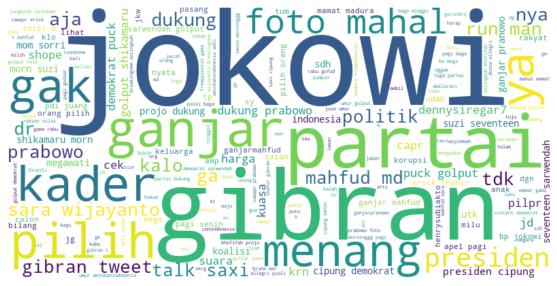

In [18]:
from wordcloud import WordCloud

# Menggabungkan semua token menjadi satu string
all_text = ' '.join([' '.join(tokens) for tokens in data['stemmed_tokens']])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


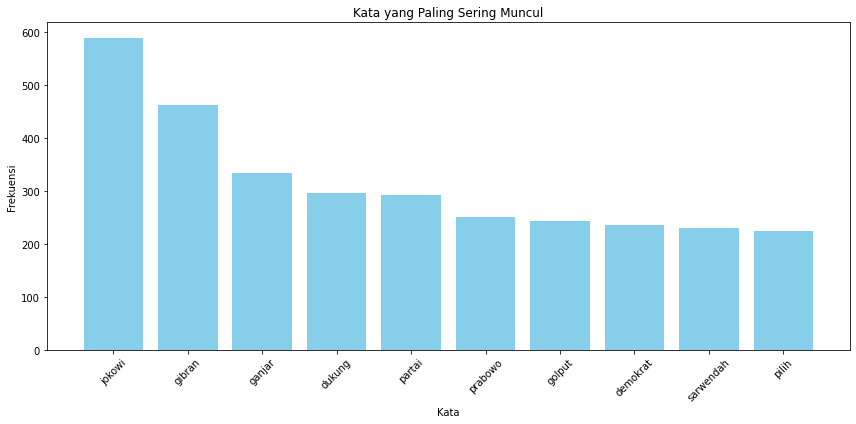

In [19]:
from collections import Counter

# Menggabungkan semua token menjadi satu list
all_tokens = [token for sublist in data['stemmed_tokens'].tolist() for token in sublist]

# Menghitung frekuensi kata-kata
word_frequencies = Counter(all_tokens)

# Mengambil kata dengan frekuensi tertinggi
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

# Plotting bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang Paling Sering Muncul')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
data

,full_text,reply_count,retweet_count,favorite_count,username,text_tokens,stemmed_tokens
0,pdip lagi wkwkwkwk,0,0,0,bimaprimidiza,"[pdip, wkwkwkwk]",[wkwkwkwk]
1,fahrihamzah buat partai tapi kader partai lain...,0,0,0,sitolin8,"[fahrihamzah, partai, kader, partai, sanjung, ...","[fahrihamzah, partai, kader, partai, sanjung, ..."
2,samlawi 84 atrirrst48250 bangpakat yudhashanny...,0,0,0,tunggulkayu01,"[samlawi, 84, atrirrst48250, bangpakat, yudhas...","[samlawi, 84, atrirrst48250, bangpakat, yudhas..."
3,hakimgarislurus ahmadsaifulch paltiwest iya pd...,0,0,4,Smart_O_,"[hakimgarislurus, ahmadsaifulch, paltiwest, iy...","[hakimgarisluru, ahmadsaifulch, paltiwest, iya..."
4,kasiandolo sandi gagal cawapres karena ppp bag...,0,0,1,LauHamzah,"[kasiandolo, sandi, gagal, cawapres, ppp, duku...","[kasiandolo, sandi, gagal, cawapr, ppp, dukung..."
...,...,...,...,...,...,...,...
1756,anak ogi gibran tweet detik akhir akan menentu...,0,0,0,GPolitik1277,"[anak, ogi, gibran, tweet, detik, menentukanda...","[anak, ogi, gibran, tweet, detik, menentukanda..."
1757,christianjazzy ya pdip nunggu sikap ksatria gi...,1,0,1,StefanAntonio__,"[christianjazzy, ya, pdip, nunggu, sikap, ksat...","[christianjazzi, ya, nunggu, sikap, ksatria, g..."
1758,acara seminar kok nongol film porno apa karena...,0,0,0,13lue_Oc3an__,"[acara, seminar, nongol, film, porno, capres, ...","[acara, seminar, nongol, film, porno, capr, ga..."
1759,dorothy hoffner 104 tahun dan pecah rekor duni...,0,0,0,infoterkiniv,"[dorothy, hoffner, 104, pecah, rekor, dunia, t...","[dorothi, hoffner, 104, pecah, rekor, dunia, t..."


In [21]:
import pandas as pd


# Mendefinisikan kata-kata kunci
keywords = ['jokowi', 'gibran', 'ganjar', 'mahfud', 'prabowo']

# Buat kolom "label" yang menggabungkan semua kata kunci
data['label'] = data['stemmed_tokens'].apply(lambda tokens: ', '.join([keyword for keyword in keywords if keyword in tokens]))

# Tampilkan DataFrame hasil
data

,full_text,reply_count,retweet_count,favorite_count,username,text_tokens,stemmed_tokens,label
0,pdip lagi wkwkwkwk,0,0,0,bimaprimidiza,"[pdip, wkwkwkwk]",[wkwkwkwk],
1,fahrihamzah buat partai tapi kader partai lain...,0,0,0,sitolin8,"[fahrihamzah, partai, kader, partai, sanjung, ...","[fahrihamzah, partai, kader, partai, sanjung, ...",
2,samlawi 84 atrirrst48250 bangpakat yudhashanny...,0,0,0,tunggulkayu01,"[samlawi, 84, atrirrst48250, bangpakat, yudhas...","[samlawi, 84, atrirrst48250, bangpakat, yudhas...",
3,hakimgarislurus ahmadsaifulch paltiwest iya pd...,0,0,4,Smart_O_,"[hakimgarislurus, ahmadsaifulch, paltiwest, iy...","[hakimgarisluru, ahmadsaifulch, paltiwest, iya...",jokowi
4,kasiandolo sandi gagal cawapres karena ppp bag...,0,0,1,LauHamzah,"[kasiandolo, sandi, gagal, cawapres, ppp, duku...","[kasiandolo, sandi, gagal, cawapr, ppp, dukung...",
...,...,...,...,...,...,...,...,...
1756,anak ogi gibran tweet detik akhir akan menentu...,0,0,0,GPolitik1277,"[anak, ogi, gibran, tweet, detik, menentukanda...","[anak, ogi, gibran, tweet, detik, menentukanda...",gibran
1757,christianjazzy ya pdip nunggu sikap ksatria gi...,1,0,1,StefanAntonio__,"[christianjazzy, ya, pdip, nunggu, sikap, ksat...","[christianjazzi, ya, nunggu, sikap, ksatria, g...",gibran
1758,acara seminar kok nongol film porno apa karena...,0,0,0,13lue_Oc3an__,"[acara, seminar, nongol, film, porno, capres, ...","[acara, seminar, nongol, film, porno, capr, ga...",ganjar
1759,dorothy hoffner 104 tahun dan pecah rekor duni...,0,0,0,infoterkiniv,"[dorothy, hoffner, 104, pecah, rekor, dunia, t...","[dorothi, hoffner, 104, pecah, rekor, dunia, t...",


In [22]:
import pandas as pd

# Membuat kolom total_engagement dengan menggabungkan reply_count, retweet_count, dan favorite_count
data["total_engagement"] = data["reply_count"] + data["retweet_count"] + data["favorite_count"]

# Mengurutkan DataFrame berdasarkan total_engagement dari yang terbanyak ke yang terendah
sorted_data = data.sort_values(by="total_engagement", ascending=False)

# Membuat DataFrame baru dengan hasil pengurutan
new_dataframe = sorted_data[["full_text", "reply_count", "retweet_count", "favorite_count", "total_engagement", "username"]]

new_dataframe = pd.DataFrame(new_dataframe)

new_dataframe.head(20)

,full_text,reply_count,retweet_count,favorite_count,total_engagement,username
379,konon kalau ini kelola dengan baik seluruh rak...,73,277,294,644,BosPurwa
700,henrysubiakto salah satu indikasi jokowi mulai...,32,8,107,147,danielht2009
952,konjugasi yolanda tamara caleg dpr ri dari par...,11,12,109,132,_aintover
620,calon presiden dari pdip ganjar pranowo sudah ...,74,6,43,123,tvOneNews
168,megawati pdip sorry mom dora madura inisial m ...,3,17,58,78,nnwnxqaycaca254
501,tidak lagi percaya rakyat malam kamis gibran f...,8,9,60,77,priamisterius00
1703,h2h caprescawapres dasar propinsi lahir anies ...,13,12,50,75,kafiradikalis
335,komitmen ganjar rang korupsi foto mahal 2023 3...,19,12,36,67,AsmawatiMuni43
39,silsilah keluarga ganjar turun walisongo foto ...,27,9,24,60,AsmiasihM45
486,pasang ganjarmahfud sesuai dengan aspirasi rak...,11,3,41,55,JokowiHokage


In [23]:
data

,full_text,reply_count,retweet_count,favorite_count,username,text_tokens,stemmed_tokens,label,total_engagement
0,pdip lagi wkwkwkwk,0,0,0,bimaprimidiza,"[pdip, wkwkwkwk]",[wkwkwkwk],,0
1,fahrihamzah buat partai tapi kader partai lain...,0,0,0,sitolin8,"[fahrihamzah, partai, kader, partai, sanjung, ...","[fahrihamzah, partai, kader, partai, sanjung, ...",,0
2,samlawi 84 atrirrst48250 bangpakat yudhashanny...,0,0,0,tunggulkayu01,"[samlawi, 84, atrirrst48250, bangpakat, yudhas...","[samlawi, 84, atrirrst48250, bangpakat, yudhas...",,0
3,hakimgarislurus ahmadsaifulch paltiwest iya pd...,0,0,4,Smart_O_,"[hakimgarislurus, ahmadsaifulch, paltiwest, iy...","[hakimgarisluru, ahmadsaifulch, paltiwest, iya...",jokowi,4
4,kasiandolo sandi gagal cawapres karena ppp bag...,0,0,1,LauHamzah,"[kasiandolo, sandi, gagal, cawapres, ppp, duku...","[kasiandolo, sandi, gagal, cawapr, ppp, dukung...",,1
...,...,...,...,...,...,...,...,...,...
1756,anak ogi gibran tweet detik akhir akan menentu...,0,0,0,GPolitik1277,"[anak, ogi, gibran, tweet, detik, menentukanda...","[anak, ogi, gibran, tweet, detik, menentukanda...",gibran,0
1757,christianjazzy ya pdip nunggu sikap ksatria gi...,1,0,1,StefanAntonio__,"[christianjazzy, ya, pdip, nunggu, sikap, ksat...","[christianjazzi, ya, nunggu, sikap, ksatria, g...",gibran,2
1758,acara seminar kok nongol film porno apa karena...,0,0,0,13lue_Oc3an__,"[acara, seminar, nongol, film, porno, capres, ...","[acara, seminar, nongol, film, porno, capr, ga...",ganjar,0
1759,dorothy hoffner 104 tahun dan pecah rekor duni...,0,0,0,infoterkiniv,"[dorothy, hoffner, 104, pecah, rekor, dunia, t...","[dorothi, hoffner, 104, pecah, rekor, dunia, t...",,0


In [43]:
new_dataframe = pd.DataFrame(data, columns=['label', 'username'])

In [44]:
new_dataframe = new_dataframe[new_dataframe['label'] != '']

In [45]:
# Memisahkan label dan menggabungkannya menjadi beberapa baris
new_dataframe['label'] = new_dataframe['label'].str.split(', ')

# Membuat DataFrame yang telah dipisah per baris
new_dataframe = new_dataframe.explode('label')

In [46]:
new_dataframe

,label,username
3,jokowi,Smart_O_
9,jokowi,ZoneVenomWar
11,jokowi,iamevasetiyawan
12,jokowi,Menjaditerang1
12,gibran,Menjaditerang1
...,...,...
1752,gibran,MLGNetworkCom
1756,gibran,GPolitik1277
1757,gibran,StefanAntonio__
1758,ganjar,13lue_Oc3an__


In [53]:
new_dataframe = new_dataframe.reset_index(drop=True)
new_dataframe

,label,username
0,jokowi,Smart_O_
1,jokowi,ZoneVenomWar
2,jokowi,iamevasetiyawan
3,jokowi,Menjaditerang1
4,gibran,Menjaditerang1
...,...,...
1464,gibran,MLGNetworkCom
1465,gibran,GPolitik1277
1466,gibran,StefanAntonio__
1467,ganjar,13lue_Oc3an__


In [54]:
import csv

new_dataframe.to_csv('username_label.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

In [52]:
import csv

# Pisahkan setiap kata token menjadi baris tersendiri bersama dengan username
rows = []
for _, row in data.iterrows():
    for token in row['stemmed_tokens']:
        rows.append([token, row['username']])

# Buat DataFrame baru untuk kata-kata token dan username
result_df = pd.DataFrame(rows, columns=['stemmed_tokens', 'username'])
result_df

,stemmed_tokens,username
0,wkwkwkwk,bimaprimidiza
1,fahrihamzah,sitolin8
2,partai,sitolin8
3,kader,sitolin8
4,partai,sitolin8
...,...,...
32228,kampu,KontenSi
32229,partaisocm,KontenSi
32230,pilih,KontenSi
32231,jokowi,KontenSi


In [ ]:

# Simpan hasil ke file CSV
result_df.to_csv('output_without_pdip_label.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)